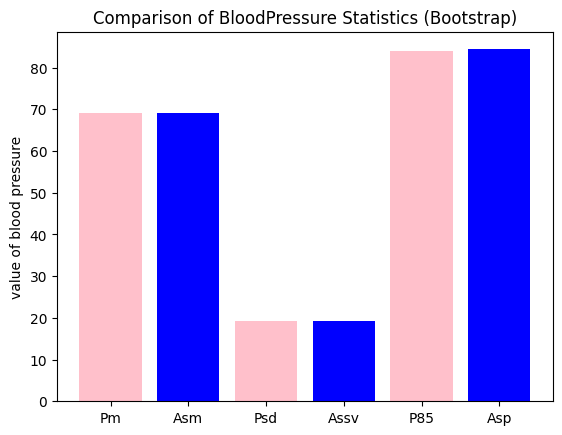

Population Mean BloodPressure: 69.10546875
Average Sample Mean BloodPressure: 69.09444
Population Std Dev BloodPressure: 19.355807170644777
Average Sample Std Dev BloodPressure: 19.276352185950127
Population 85th Percentile BloodPressure: 84.0
Average Sample 85th Percentile BloodPressure: 84.3934


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
laa = pd.read_csv('/content/diabetes.csv')


np.random.seed(810)


def bootstrap_statistics(data, variable, num_samples=500, sample_size=150):
    sample_means = []
    sample_std_devs = []
    sample_percentiles = []

    for _ in range(num_samples):

        sample = data.sample(n=sample_size, replace=True)


        mean = sample[variable].mean()
        std_dev = sample[variable].std()
        percentile = np.percentile(sample[variable], 85)


        sample_means.append(mean)
        sample_std_devs.append(std_dev)
        sample_percentiles.append(percentile)

    return sample_means, sample_std_devs, sample_percentiles


sample_means, sample_std_devs, sample_percentiles = bootstrap_statistics(df, 'BloodPressure')


population_mean = laa['BloodPressure'].mean()
population_std_dev = laa['BloodPressure'].std()
population_percentile = np.percentile(laa['BloodPressure'], 85)


labels = ['Pm', 'Asm', 'Psd', 'Assv',
          'P85', 'Asp']
values = [population_mean, np.mean(sample_means),
          population_std_dev, np.mean(sample_std_devs),
          population_percentile, np.mean(sample_percentiles)]

plt.bar(labels, values, color=['pink', 'blue', 'pink', 'blue', 'pink', 'blue'])
plt.title('Comparison of BloodPressure Statistics (Bootstrap)')
plt.ylabel('value of blood pressure')
plt.show()


print(f"Population Mean BloodPressure: {population_mean}")
print(f"Average Sample Mean BloodPressure: {np.mean(sample_means)}")

print(f"Population Std Dev BloodPressure: {population_std_dev}")
print(f"Average Sample Std Dev BloodPressure: {np.mean(sample_std_devs)}")

print(f"Population 85th Percentile BloodPressure: {population_percentile}")
print(f"Average Sample 85th Percentile BloodPressure: {np.mean(sample_percentiles)}")
